In [1]:
from mountain import Mountain_one
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# def policy_evaluation(policy, env, gamma=1, eps=1e-4, order='rtl'):
#     """
#     Evaluate a policy given an environment and a description of it.
#     
#     Parameters:
#         policy: A function that maps a state to an action.
#         env: The environment which is an instance of the Mountain class.
#         gamma: The discount factor.
#         eps: We stop evaluation once our value function change is less than eps for all states.
#         order: Order in which to update the states.
#     
#     Returns:
#         State-value function.
#     """
#     V = np.zeros((30, 100))
# 
#     iter = 0
#     while True:
#         delta = 0
#         states = [(i, j) for i in range(30) for j in range(100)]
#         if order == 'rtl':
#             states.reverse()
# 
#         for state in states:
#             action = policy(state)
#             next_state = env.next_state(state, action)
#             reward = env.get_reward(state, action)
#             v = reward + gamma * V[next_state]
# 
#             delta = max(delta, np.abs(v - V[state]))
#             V[state] = v
# 
#             iter += 1
# 
#         if delta < eps:
#             print("Number of iterations:", iter)
#             break
# 
#     return V

In [3]:
def policy_evaluation(policy, env, gamma=1, eps=1e-4, order='rtl'):
    """
    Evaluate a policy given an environment and a description of it.
    
    Parameters:
        policy: A function that maps a state to an action.
        env: The environment which is an instance of the Mountain class.
        gamma: The discount factor.
        eps: We stop evaluation once our value function change is less than eps for all states.
        order: Order in which to update the states.
    
    Returns:
        State-value function.
    """
    
    V = np.zeros((30, 100))

    iter = 0
    while True:
        delta = 0
        states = [(i, j) for i in range(30) for j in range(100)]
        if order == 'rtl':
            states.reverse()

        for state in states:
            v = 0

            action_probabilities = policy(state)

            for action, prob in action_probabilities.items():
                next_state = env.next_state(state, action)
                reward = env.get_reward(state, action)
                v += prob * (reward + gamma * V[next_state])

            delta = max(delta, np.abs(v - V[state]))
            V[state] = v

            iter += 1

        if delta < eps:
            print("Number of iterations:", iter)
            break

    return V

In [4]:
def policy_random(state):
    actions = ["upforward", "forward", "downforward"]
    action_probabilities = {action: 1 / 3 for action in actions}
    return action_probabilities

2. Consider the policy $\pi_{str}$ of heading straight ahead. Use policy evaluation to compute $v_{\pi_{str}}$.

In [5]:
def policy_straight(state):
    return {"forward": 1.0}

3. (*) Run your policy evaluation ordering the states from left to right (from the top of the mountain to the bottom) 
or from right to left (from the bottom of the mountain to the top). How do the results differ?

In [6]:
env = Mountain_one()
v_straight_left_to_right = policy_evaluation(policy_straight, env, order='ltr')

Number of iterations: 297000


In [7]:
v_straight_right_to_left = policy_evaluation(policy_straight, env, order='rtl')

Number of iterations: 6000


4. Plot the trajectory followed by the robot according to $\pi_{str}$ from $s_0$ = (15, 0).
5. Plot the trajectory followed by the robot according to $\pi_{str}$ from $s_0$ = (3, 0).

In [8]:
def plot_trajectory(env, policy, initial_state):
    mountain_map = env.get_map()

    fig, ax = plt.subplots()
    ax.imshow(mountain_map, cmap='Greys_r', origin='upper')
    ax.set_title('Mountain Terrain')
    ax.set_xticks(np.arange(0, 101, 20))
    ax.set_yticks(np.arange(0, 31, 10))
    ax.grid(True)

    current_state = initial_state
    trajectory = [current_state]

    while current_state[1] < 99: 
        action_probabilities = policy(current_state)
        action = max(action_probabilities, key=action_probabilities.get)
        next_state = env.next_state(current_state, action)
        trajectory.append(next_state)
        current_state = next_state

    x, y = zip(*[(state[1], state[0]) for state in trajectory])

    ax.plot(x, y, marker='.', linestyle='-', color='slateblue')
    plt.show()

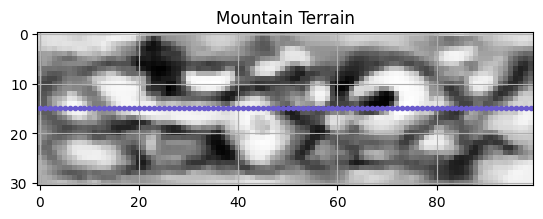

In [9]:
plot_trajectory(env, policy_straight, (15, 0))

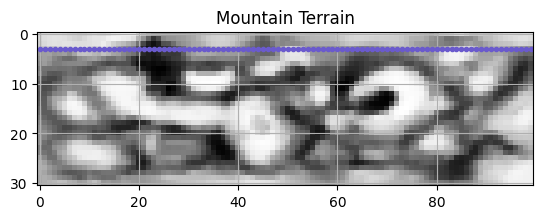

In [10]:
plot_trajectory(env, policy_straight, (3, 0))

6. If the agent were to follow the policy $\pi_{str}$, which starting position in the first column would be optimal?

In [11]:
v_straight_left_to_right[:, 0].argmax()

7

8. Consider now a random policy $\pi_{rnd}$ where each action is taken with uniform probability. Use policy evaluation to compute $v_{\pi_{str}}$.